# Attestation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
from bs4 import BeautifulSoup
import requests
from pprint import pprint
import schedule
import time
from chardet.universaldetector import UniversalDetector


In [3]:
a = [1,2,3]
b = a
c = [1,2,3]
print(a == b, a == c, a is b, a is c)

True True True False


In [12]:
one = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")

In [21]:
my_lst = [1, "2", 3, "4"]
my_lst = my_lst[:-1]
print(my_lst)

[1, '2', 3]


In [24]:
config = {
    "server": {
        "host": "127.0.0.1",
        "port": "22"
    },
    "configuration": {
        "ssh": {
            "access": True,
            "login": "some_log",
            "password": "some_pass"
        },
        "name": "2491Oaaf1414"
    }
}

In [29]:
config['configuration']['ssh']['login']

'some_log'

In [38]:
s = 'abd gfdlps'

In [39]:
s.replace(' ', '')
print(s)

abd gfdlps


In [ ]:
s.split(' ')


['abd', 'gfdlps']

In [42]:
''.join(s)
print(s)

abd gfdlps


In [43]:
temperature = 30
remaining_time = '09:00'


In [47]:
r'Температура: {temperature}, оставшееся время: {remaining_time}'

'Температура: {temperature}, оставшееся время: {remaining_time}'

In [48]:
s = '45506069'

In [52]:
s.lower()

'45506069'

In [ ]:
# Функция чтения данных
def read_data():
    data = open('war_peace_processed.txt', 'rt', encoding='utf-8').read()
    data = data.split('\n')
    return data


# Функция подсчёта частоты употребления слова в тексте
def freq(target_word):  
    new_dict = dict() 
    for i in data: # СТРОКА С ОШИБКОЙ
        if i not in new_dict:
            new_dict[i] = 1
        else:
            new_dict[i] = new_dict.get(i) + 1
    return new_dict.get(target_word, 0)


# Вызов функций
read_data()
freq('война')

Вам предоставлен словарь products, ключами которого являются названия продуктов, а значениями — их цены. Затем к вам приходит другой словарь (stocks), ключи которого — товары, а значения — скидки (в процентах) на товары.

Напишите функцию apply_discounts(products, stocks), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены. Если продукта из словаря stocks нет в словаре products, то его необходимо пропустить. Цены округлите до второго знака после запятой.

In [58]:
def apply_discounts(products, stocks):
    updated_products = {}
    for product, price in products.items():
        if product in stocks:
            stock_percentage = int(stocks[product].strip('%'))
            discount = stock_percentage / 100  # Скидка в процентах
            discounted_price = price * (1 - discount)
            updated_products[product] = round(discounted_price, 2)
        else:
            updated_products[product] = price
    return updated_products

products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}

print(apply_discounts(products, stocks))

## {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


Вам даны два файла bronze_top.csv и silver_top.csv, в которых хранится информация о ТОП-5 стран по числу бронзовых и серебряных медалей соответственно. В каждой таблице два одинаковых столбца: Country — страна и Total — число медалей.

Создайте два DataFrame на основе заданных csv-файлов. Объедините таблицы по странам таким образом, чтобы в результат вошли данные только о тех странах, которые попали в оба рейтинга. При этом в качестве суффиксов укажите строки "_bronze" и "_silver", чтобы столбцы таблиц, не участвовавших в объединении, можно было различать.

Результирующий DataFrame занесите в переменную merged. В нём должны быть следующие столбцы:

Country
Total_bronze
Total_silver
Не забудьте добавить в свой код импорт библиотеки pandas.

Также обратите внимание, что для отправки решения на проверку выводить результат на экран не нужно.

In [66]:
import pandas as pd

# Чтение данных из файлов
bronze = pd.read_csv('bronze_top.csv')
silver = pd.read_csv('silver_top.csv')

display(bronze.head())
display(silver.head())

# Объединение по странам, только для тех, кто есть в обоих рейтингах
merged = pd.merge(
    bronze,
    silver,
    on='Country',
    how='inner',
    suffixes=('_bronze', '_silver')
)

print(merged)


,Country,Total
0,Germany,1
1,Spain,2
2,France,3
3,Russia,10
4,USA,0


,Country,Total
0,Germany,1
1,Spain,2
2,France,3
3,Russia,10
4,USA,0


   Country  Total_bronze  Total_silver
0  Germany             1             1
1    Spain             2             2
2  France              3             3
3   Russia            10            10
4      USA             0             0


###  3. Практические задания в Jupyter Notebook

✍ В данном блоке вам предстоит решить задачу, которую автор модуля когда-то решал на одном из собеседований.

Дана таблица с данными о ежедневной выработке энергии солнечными батареями. Информация содержится в двух столбцах:

- date — дата наблюдения;
- cum_power — накопленная (кумулятивная) выработка энергии на указанный день.
Таким образом, перед вами классический пример временного ряда — числовой показатель, зависящий от времени. Давайте с ним поработаем.

Для начала прочитаем таблицу и выведем первые пять её строк:

In [68]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


### Задание 3.1

В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

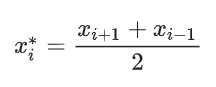

Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.

In [85]:
for i in range(1, len(solar_data['cum_power']) - 1):
    if solar_data.loc[i, 'cum_power'] == -1:
        solar_data.loc[i, 'cum_power'] = 0.5 * (solar_data.loc[i - 1, 'cum_power'] + solar_data.loc[i + 1, 'cum_power'])

solar_data['cum_power'].mean()

np.float64(23848.246987951807)

### Задание 3.2

Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

In [88]:
solar_data['month'] = pd.to_datetime(solar_data['date']).dt.to_period('M')
display(solar_data.head())

,date,cum_power,month
0,2017-01-01,20111.0,2017-01
1,2017-01-02,20112.0,2017-01
2,2017-01-03,20115.0,2017-01
3,2017-01-04,20117.0,2017-01
4,2017-01-05,20119.0,2017-01


In [100]:
# создаю столбец daily_power — ежедневная выработка солнечной энергии

for i in range(1, len(solar_data['cum_power'])):
    solar_data.loc[i, 'daily_power'] = solar_data.loc[i, 'cum_power'] - solar_data.loc[i - 1, 'cum_power']

display(solar_data.head())

# Суммарная выработка за март 2017
march_2017_mask = solar_data['month'] == pd.Period('2017-03')
month_days = pd.Period('2017-03').days_in_month
month_power = solar_data.loc[march_2017_mask, 'daily_power'].sum()

print(month_days)
print(month_power)

daily_average = month_power / month_days
print(daily_average)

,date,cum_power,month,day_power,daily_power
0,2017-01-01,20111.0,2017-01,0,NaN
1,2017-01-02,20112.0,2017-01,0,1.0
2,2017-01-03,20115.0,2017-01,0,3.0
3,2017-01-04,20117.0,2017-01,0,2.0
4,2017-01-05,20119.0,2017-01,0,2.0


31
334.0
10.774193548387096


### Задание 3.3

Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

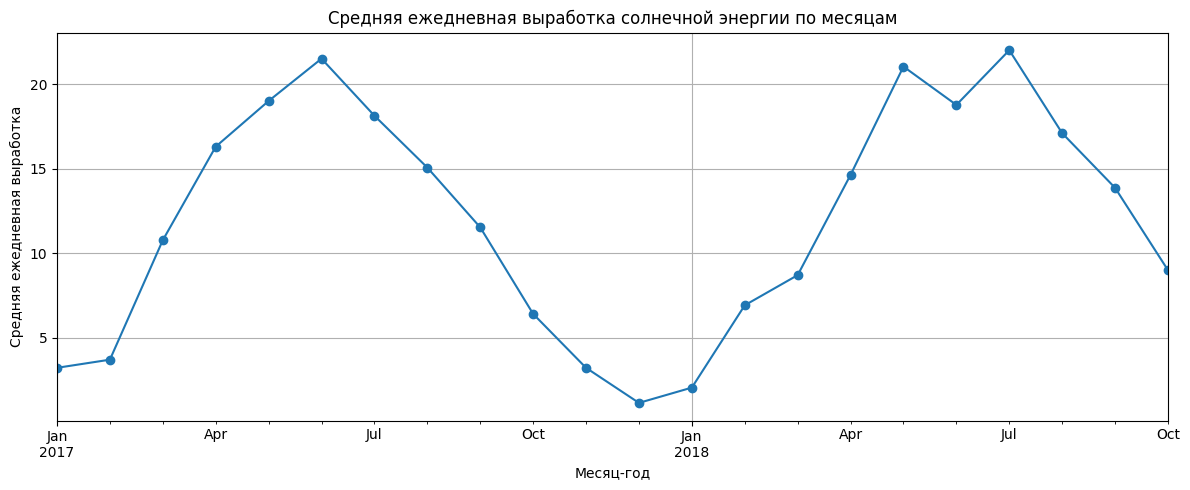

In [102]:
# Группируем по месяцам и считаем среднюю ежедневную выработку
monthly_avg = solar_data.groupby('month')['daily_power'].mean()

plt.figure(figsize=(12, 5))
monthly_avg.plot(marker='o')
plt.title('Средняя ежедневная выработка солнечной энергии по месяцам')
plt.xlabel('Месяц-год')
plt.ylabel('Средняя ежедневная выработка')
plt.grid(True)
plt.tight_layout()
plt.show()